Dataset preview:
   anime_id                title type    source  score  \
0   11013.0        Inu x Boku SS   TV     Manga   7.63   
1    2104.0     Seto no Hanayome   TV     Manga   7.89   
2    5262.0   Shugo Chara!! Doki   TV     Manga   7.55   
3     721.0        Princess Tutu   TV  Original   8.21   
4   12365.0  Bakuman. 3rd Season   TV     Manga   8.67   

                                      genre  episode  
0    Comedy, Supernatural, Romance, Shounen     12.0  
1  Comedy, Parody, Romance, School, Shounen     26.0  
2             Comedy, Magic, School, Shoujo     51.0  
3    Comedy, Drama, Magic, Romance, Fantasy     38.0  
4           Comedy, Drama, Romance, Shounen     25.0  
Available columns: Index(['anime_id', 'title', 'type', 'source', 'score', 'genre', 'episode'], dtype='object')


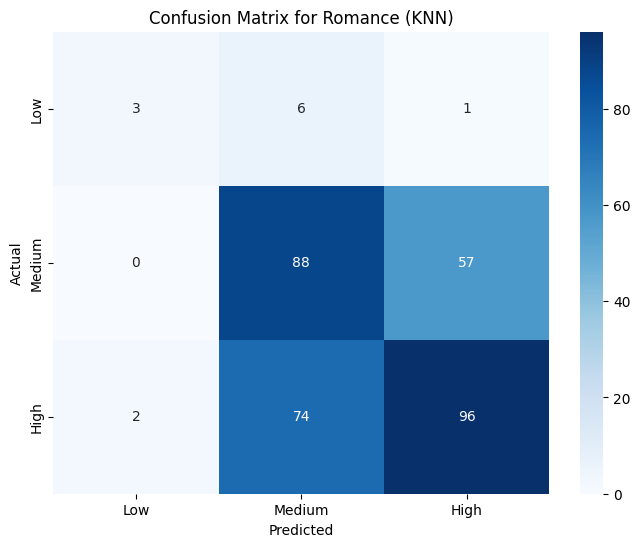

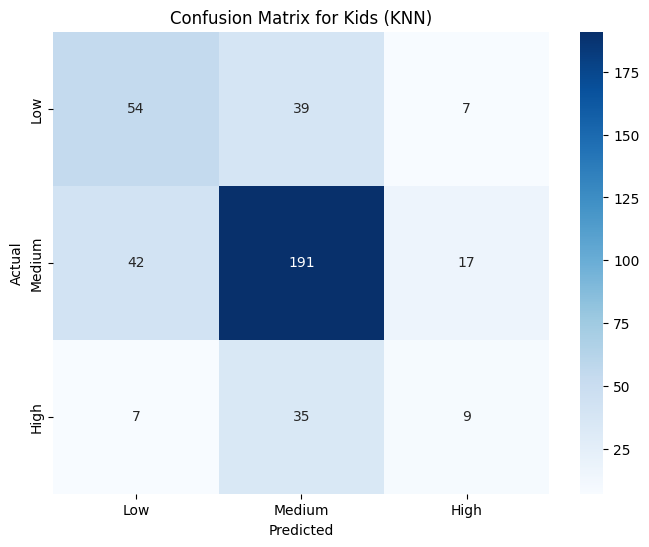

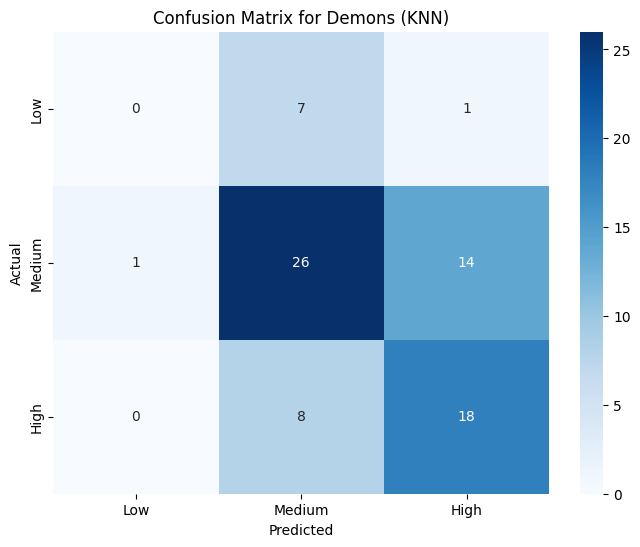

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Function to run KNN for specified genres
def run_knn_for_genres(genres):
    # Load the dataset
    data = pd.read_csv('AnimeList.csv')

    print("Dataset preview:")
    print(data.head())
    print("Available columns:", data.columns)

    # Initialize storage for results
    results = {}

    for genre in genres:
        # Filter for the specified genre
        genre_data = data[data['genre'].str.contains(genre, na=False)].copy()

        if genre_data.empty:
            print(f"No anime found for the genre: {genre}")
            continue

        # Preprocessing the data
        label_encoder = LabelEncoder()
        categorical_cols = ['type', 'source']

        for col in categorical_cols:
            if col in genre_data.columns:
                genre_data[col] = label_encoder.fit_transform(genre_data[col].fillna('Unknown'))

        # Drop unnecessary columns
        genre_data = genre_data.drop(['title', 'anime_id'], axis=1, errors='ignore')

        if 'score' in genre_data.columns:
            X = genre_data.drop('score', axis=1)
            y = genre_data['score'].fillna(genre_data['score'].mean())

            # Categorize scores for classification ('Low', 'Medium', 'High')
            y_binned = pd.cut(y, bins=[0, 5, 7, 10], labels=["Low", "Medium", "High"], include_lowest=True)

            # Select numeric columns for training
            X = X.select_dtypes(include=[np.number])
            if X.shape[1] == 0:
                print("No numeric features found for training. Please check your dataset.")
            else:
                X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

                # Set neighbors and ensure it does not exceed the number of training samples
                knn_model = KNeighborsClassifier(n_neighbors=5)
                knn_model.fit(X_train, y_train)

                # Predictions
                y_pred = knn_model.predict(X_test)

                # Confusion Matrix
                cm = confusion_matrix(y_test, y_pred, labels=["Low", "Medium", "High"])

                # Plot Confusion Matrix using Seaborn heatmap
                plt.figure(figsize=(8, 6))
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
                plt.title(f'Confusion Matrix for {genre} (KNN)')
                plt.xlabel('Predicted')
                plt.ylabel('Actual')
                plt.show()

                # Store results for further analysis
                results[genre] = {
                    'y_test': y_test,
                    'y_pred': y_pred,
                    'cm': cm
                }

run_knn_for_genres(['Romance', 'Kids', 'Demons'])
